In [1]:
import json
import pandas as pd
from rapidfuzz import process

# Import JSON file
f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_affiliation_output_1940_2010.json')
json_data = json.load(f)

# Define Journal and Dataframe
Journal_Name = 'JPE'
Reference_Data_List = []

# Extract Json Data into dataframe
for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorsNo = len(author_list)
    stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]

    Reference_Data_List.append({'Journal_Name' : Journal_Name,
    'Authors_count' : authorsNo, 
    'Article_ID' : Article_ID, 'content_type' : content_type,
    'stable_url' : stable_url, 
    'Ref_type': Ref_type,  'ref_string':ref_string })

JPE_aff_ref_output_1940_2010 = pd.DataFrame.from_records(Reference_Data_List)     
JPE_aff_ref_output_1940_2010.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/Working files/JPE_aff_ref_output_1940_2010.xlsx')        

In [2]:
affs = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/Unique Universities.xlsx')
print(affs.shape)

#testdata = JPE_1940_2010.loc[0:20].reset_index(drop = True)
testdata = JPE_aff_ref_output_1940_2010

for i in range(len(affs)):
    #Replaceing title case and stripping leading space
    affs.iat[i,0] = affs.iat[i,0].strip().title()
Affiliation_choices = affs['Affilliation'].values.tolist()

for i in range(len(testdata)):
    #Replaceing title case and stripping leading space
    testdata.iat[i,6] = testdata.iat[i,6].strip().title()


(699, 5)


In [3]:
for i in range(len(testdata)):
    split = testdata.iat[i,6].split('\n\n')
    split_len = len(testdata.iat[i,6].split('\n\n'))
    affiliations = []
    count_no_aff = 0
    for j in range(split_len):
        #print(i)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) > 0:
            affiliations = affiliations + process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) == 0:
            count_no_aff = count_no_aff+1

        if count_no_aff == 8:
            break
        if j == split_len:
            break

    print("Length = " , len(affiliations), ", Number = ",i)
    if len(affiliations) == 0:
        testdata.loc[i,['Missing aff']] = "Missing"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 1:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 2:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 3:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 4:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 5:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
        print(affiliations)
    elif len(affiliations) == 6:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 7:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 8:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 9:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 10:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 11:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 12:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['aff12']] = affiliations[11][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    else: 
        testdata.loc[i,['Missing aff']] = "More than 12"


Length =  2 , Number =  0
Length =  4 , Number =  1
Length =  2 , Number =  2
Length =  3 , Number =  3
Length =  1 , Number =  4
Length =  4 , Number =  5
Length =  3 , Number =  6
Length =  0 , Number =  7
Length =  4 , Number =  8
Length =  2 , Number =  9
Length =  2 , Number =  10
Length =  2 , Number =  11
Length =  3 , Number =  12
Length =  3 , Number =  13
Length =  7 , Number =  14
Length =  0 , Number =  15
Length =  2 , Number =  16
Length =  5 , Number =  17
[('University Of Pennsylvania', 100.0, 419), ('Canadian Institute', 90.0, 116), ('Princeton University', 90.0, 203), ('For Advanced Research', 90.0, 232), ('National Bureau Of Economic Research', 90.0, 618)]
Length =  3 , Number =  18
Length =  2 , Number =  19
Length =  7 , Number =  20
Length =  2 , Number =  21
Length =  3 , Number =  22
Length =  0 , Number =  23
Length =  3 , Number =  24
Length =  3 , Number =  25
Length =  1 , Number =  26
Length =  1 , Number =  27
Length =  4 , Number =  28
Length =  5 , Numbe

In [4]:
testdata.head
testdata.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/Working files/JPE_aff_ref_output_1940_2010_affs_out.xlsx') 

In [5]:
melted = testdata.melt(id_vars= 'Article_ID', value_vars=['aff1','aff2','aff3','aff4','aff5','aff6','aff7','aff8','aff9','aff10']).dropna()
melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)
print(melted.head())

  Article_ID Aff number             Affiliation
0   26549911       aff1         Yale University
1   26549912       aff1      Harvard University
2   26549913       aff1       Purdue University
3   26549914       aff1      Tilburg University
4   26549915       aff1  University Of Maryland


In [6]:
JPE_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/Master lists/Processed/JPE_processed.xlsx')

for i in range(len(JPE_master)):
    JPE_master.loc[i,['Article_ID']] = JPE_master.loc[i,['stable_url']].to_string().rsplit('/',1)[-1]

JPE_master_condenced  = JPE_master[['Article_ID','year']]
JPE_master_condenced.head()

,Article_ID,year
0,26549909,2016.0
1,26549910,2016.0
2,26549911,2016.0
3,26549912,2016.0
4,26549913,2016.0


In [7]:
JPE_melted_master = melted.merge(JPE_master_condenced, how = 'left', on = 'Article_ID')
JPE_melted_master = JPE_melted_master.sort_values(by=['year'])
JPE_melted_master.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/JPE_melted_master.xlsx') 
JPE_melted_master.head()

,Article_ID,Aff number,Affiliation,year
3738,1824377,aff1,Core,1940.0
3721,1825509,aff1,New York University,1940.0
5514,1824377,aff2,N.B.E.R,1940.0
3723,1825511,aff1,New York University,1940.0
6772,1824379,aff4,Woodland Hills,1940.0


In [8]:
JPE_melted_master['aff_cum_counts'] = JPE_melted_master.groupby(['Affiliation']).cumcount()+1
#QJE_melted_master['aff_cum_counts'] = QJE_melted_master.groupby(['Affiliation','year']).cumcount()+1
JPE_melted_master.head()
JPE_melted_master.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/QJE_melted_master_aff_count.xlsx') 

In [9]:
highest_vals = JPE_melted_master.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
29,26549871,aff1,National Bureau Of Economic Research,2016.0,525
19,26549894,aff1,University Of Chicago,2016.0,461
6998,26549906,aff6,Columbia University,2016.0,280
7130,26549858,aff7,Harvard University,2016.0,222
6912,1829822,aff5,Icrea-Barcelona Institute Of Political Economy,1967.0,214
7000,26549870,aff6,Massachusetts Institute Of Technology,2016.0,203
23,26549881,aff1,Stanford University,2016.0,160
15,26549890,aff1,University Of Pennsylvania,2016.0,143
0,26549911,aff1,Yale University,2016.0,127
25,26549883,aff1,Princeton University,2016.0,124


     Article_ID Aff number          Affiliation    year  aff_cum_counts
3738    1824377       aff1                 Core  1940.0               1
3721    1825509       aff1  New York University  1940.0               1
5514    1824377       aff2              N.B.E.R  1940.0               1
3723    1825511       aff1  New York University  1940.0               2
6772    1824379       aff4       Woodland Hills  1940.0               1


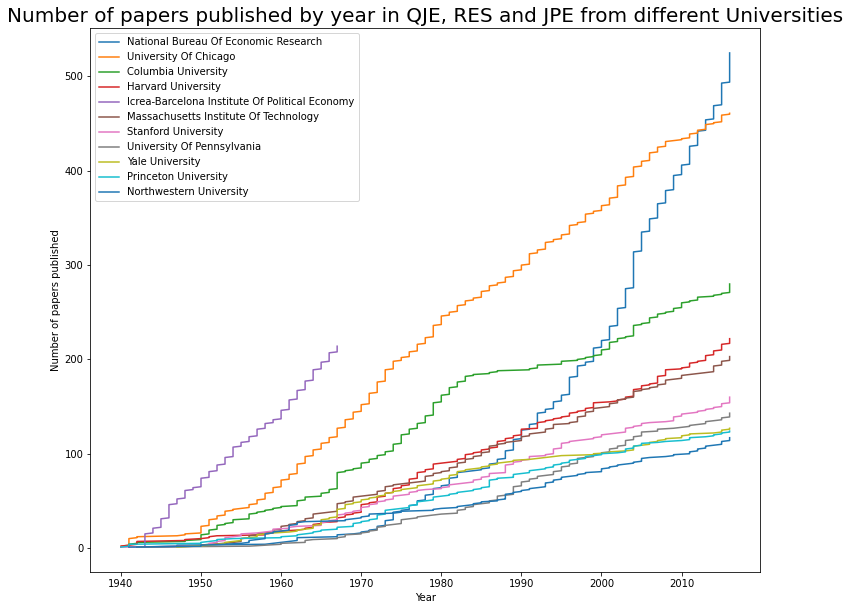

In [10]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = JPE_melted_master
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])]
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])]
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])]
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])]
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])]
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])]
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])]
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])]
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])]
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])]
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])]

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in QJE, RES and JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()